In [10]:
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [12]:
graph = read_graph("facebook_combined.txt")
print(graph)

graph = ig.Graph.from_networkx(graph)
print(graph)

Graph with 4039 nodes and 88234 edges
IGRAPH U--- 4039 88234 --
+ attr: _nx_name (v)
+ edges:
   0 --    1    2    3    4    5    6    7    8    9   10   11   12   13   14
15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46
47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62
63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78
79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94
95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  110
111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126
127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142
143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158
159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174
175  176  177  178  179  180  181  182  183 

/tmp/ipykernel_27861/459169479.py:15: RuntimeWarning: divide by zero encountered in power
  test = test ** -result.alpha


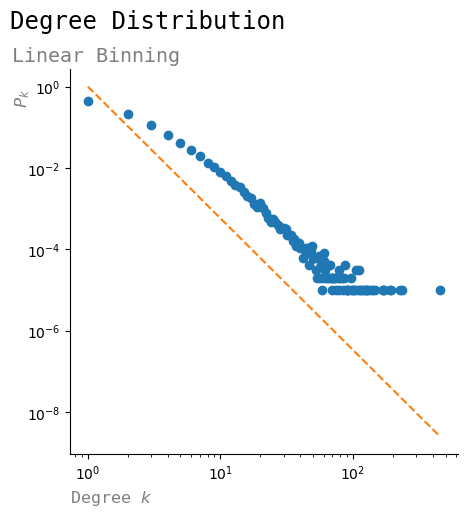

In [21]:
### Distribución de graddos

max_degree = max(graph.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in graph.vs():
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / graph.vcount()

result = ig.power_law_fit(graph.degree())

test = np.arange(max_degree)
test = test ** -result.alpha

fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [22]:
def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(
                degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)
            break

    return x_values, y_values_log_bin_list

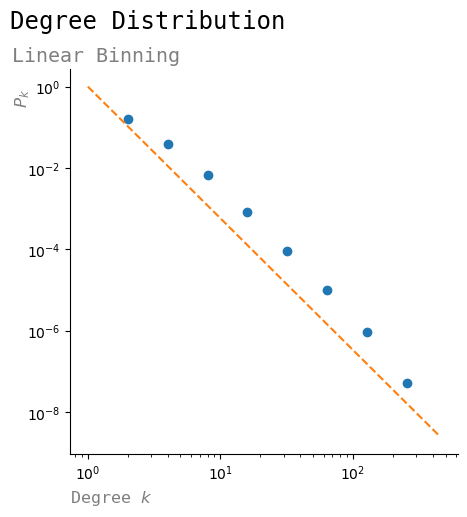

In [25]:
from math import log2, ceil
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
n_log_bin = ceil(log2(max(graph.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [27]:
from thinkstats2 import Pmf

In [26]:
pmf_fb = Pmf(graph.degree())
pmf_fb.Mean(), pmf_fb.Std()

AttributeError: 'Pmf' object has no attribute 'Mean'

In [21]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12205 sha256=6e0d1ccb4bb30336bb38739ed5aec969897ac0cdd425338eebdf8cf8e3118caf
  Stored in directory: /home/hddr/.cache/pip/wheels/e1/3b/7b/9e05941453eeac3d404f25bd2afefa929395b35f6de9770be7
Successfully built empiricaldist


In [24]:
from empiricaldist import Pmf

<Axes: >

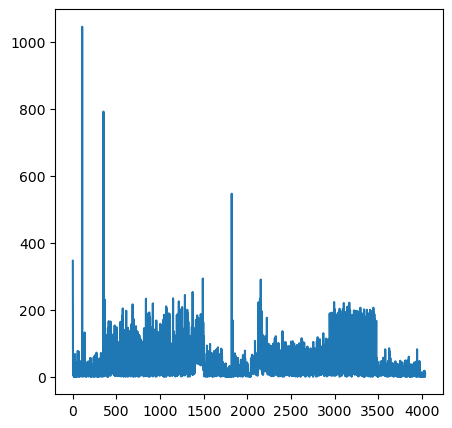

In [29]:
plt.figure(figsize=(5,5))
pmf_fb.plot(label='Facebook', color='C0')
#decorate(xlabel='Degree', ylabel='PMF')

#plt.subplot(1,2,2)
#pmf_ws.plot(label='WS graph', color='C1')
#decorate(xlabel='Degree')

#savefig('figs/chap04-1')

In [34]:
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
from utils import decorate, savefig

Downloaded utils.py


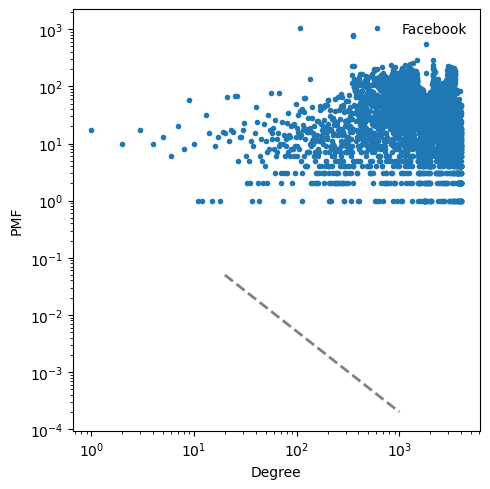

In [36]:
plt.figure(figsize=(5,5))
options = dict(ls='', marker='.')

plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')

pmf_fb.plot(label='Facebook', color='C0', **options)
decorate(xscale='log', yscale='log',
         xlabel='Degree', ylabel='PMF')



In [17]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


# Using igraph

Calculating best minimal value for power law fit


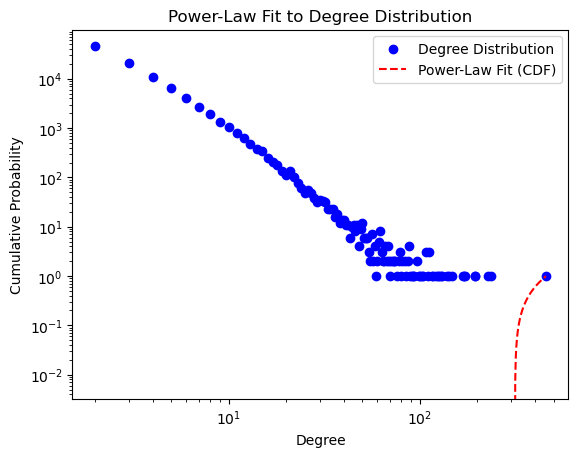

Power-Law Exponent (alpha): 6.0091293437677


In [20]:
import igraph as ig
import powerlaw
import matplotlib.pyplot as plt

# Create a random graph (you can replace this with your own graph)
# graph = ig.Graph.Erdos_Renyi(n=1000, m=2000, directed=False)
graph = ig.Graph.Barabasi(n=100000, m=2)

# Get the degree distribution
degree_distribution = graph.degree_distribution()
degrees = [degree[0] for degree in degree_distribution.bins()]

# Use the powerlaw.Fit class to fit a power-law distribution to the degree distribution.
fit = powerlaw.Fit(degrees, discrete=True)

# Convert the degree_distribution bins to a list
degree_bins = list(degree_distribution.bins())

# Visualization
plt.scatter(degrees, [freq[2] for freq in degree_bins], color='blue', label='Degree Distribution')
fit.plot_cdf(color='red', linestyle='--', label='Power-Law Fit (CDF)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Cumulative Probability')
plt.title('Power-Law Fit to Degree Distribution')
plt.legend()
plt.show()

# Retrieve Power-Law Exponent
alpha = fit.power_law.alpha
print(f"Power-Law Exponent (alpha): {alpha}")

In [5]:
degrees

[(0.0, 1.0, 20),
 (1.0, 2.0, 80),
 (2.0, 3.0, 140),
 (3.0, 4.0, 208),
 (4.0, 5.0, 187),
 (5.0, 6.0, 133),
 (6.0, 7.0, 117),
 (7.0, 8.0, 61),
 (8.0, 9.0, 27),
 (9.0, 10.0, 18),
 (10.0, 11.0, 4),
 (11.0, 12.0, 4),
 (12.0, 13.0, 1)]